# QuickStart

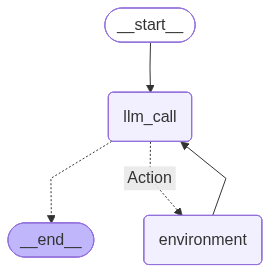

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_GEioXIguTHGPZwuPp8gQyMKX)
 Call ID: call_GEioXIguTHGPZwuPp8gQyMKX
  Args:
    a: 3
    b: 4
================================= Tool Message =================================

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.


In [14]:
# Step 0: Define tools and model

from dotenv import load_dotenv
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langchain.chat_models import init_chat_model
import os

load_dotenv()

llm = ChatOpenAI(
    api_key=os.getenv("UIUIAPI_API_KEY"),
    base_url=os.getenv("UIUIAPI_BASE_URL"),
    model="gpt-3.5-turbo",
    temperature=0.2,
)

# llm = init_chat_model(
#     model="openai:gpt-3.5-turbo",
#     configurable_fields="any", # 允许在运行时修改base_url、api_key等参数
#     base_url=os.getenv("UIUIAPI_BASE_URL"),
#     api_key=os.getenv("UIUIAPI_API_KEY"),
#     temperature=0.2,
#     max_tokens=200,
#     timeout=10,
# )

# define Tools

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply a and b.

    Args:
        a: first int
        b: second int
    returns:
        a * b
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide a and b.

    Args:
        a: fisrt int
        b: second int
    """
    return a / b

# Augment the LLM with tools
tools = [add, multiply, divide]
tools_by_name = {tool.name: tool for tool in tools}
llm_with_tools = llm.bind_tools(tools)


# Step 1: Define state

from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict, Annotated
import operator

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
    llm_calls: int

# Step2: Define model node

from langchain_core.messages import SystemMessage

def llm_call(state: dict):
    """
    LLM decides whether to call a tool or not.
    """

    return {
        "messages": [
            llm_with_tools.invoke(
                [SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")]
                + state["messages"]
            )
        ],
        "llm_calls": state.get('llm_calls', 0) + 1
    }

# Step 3" Define tool node

from langchain_core.messages import ToolMessage

def tool_node(state: dict):
    """
    Performs the tool call
    """

    result = []
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
    return {"messages": result}

# Step 4: Define logic to determin whether to end
from typing import Literal
from langgraph.graph import StateGraph, START, END

def should_continue(state: MessagesState) -> Literal["environment", END]:
    """
    Decide if we should continue the loop based upon whether the LLM made a tool call.
    """
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "Action"
    return END

# Step 5: Build agent
graph = StateGraph(MessagesState)

graph.add_node("llm_call", llm_call)
graph.add_node("environment", tool_node)

graph.add_edge(START, "llm_call")
graph.add_conditional_edges(
    "llm_call",
    should_continue,
    {
        "Action": "environment",
        END: END,
    }
)

graph.add_edge("environment", "llm_call")

compiled_graph = graph.compile()

from IPython.display import Image, display

display(Image(compiled_graph.get_graph(xray=True).draw_mermaid_png()))

from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Add 3 and 4.")]
messages = compiled_graph.invoke({"messages": messages})
for m in messages["messages"]:
    m.pretty_print()


In [15]:
# Step 0: Define tools and model

from dotenv import load_dotenv
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
import os

load_dotenv()

llm = ChatOpenAI(
    api_key=os.getenv("UIUIAPI_API_KEY"),
    base_url=os.getenv("UIUIAPI_BASE_URL"),
    model="gpt-3.5-turbo",
    temperature=0.2,
)

# Step 1: Define tools

@tool
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b


@tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b


@tool
def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b


# Augment the LLM with tools
tools = [add, multiply, divide]
tools_by_name = {tool.name: tool for tool in tools}
llm_with_tools = llm.bind_tools(tools)

from langchain.graph import add_messages
from langchain_core.messages import SystemMessage, HumanMessage, BaseMessage, ToolCall
from langchain_core.func import entrypoint, task

# Step 1: define model node

@task
def call_llm(messages: list[BaseMessage]):
    """
    LLM decides whether to call a tool or not.
    """
    return llm_with_tools.invoke(
        [SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")]
        + messages
    )

# Step2 : define tool node

def agent



content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_0165350fbb', 'id': 'chatcmpl-CEViefLm5s80epmPHSwr3T5ZK5IcU', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None} id='run--ed368229-9a50-464a-9444-95633083e458-0' usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {}, 'output_token_details': {}}
